In [1]:
from load_tensors import load_data
import tensorflow as tf
import tensorflow_addons as tfa
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import pickle
import re

/opt/homebrew/anaconda3/envs/cosc4337/lib/python3.10/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.7.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [7]:
results = {}
results['model'] = []
for j in range(4):
    i = str(j)
    results[i+'_f1_scores'] = []
    results[i+'_precision'] = []
    results[i+'_recall'] = []
results['accuracy'] = []
results['weighted_avg_f1'] = []
yt = tf.argmax(y_test, axis=1)
models_dir = os.listdir('saved_models/')
ignored_models = ['kuma_model_1', 'svm.best.pickle', 'models.svm_model_833178.pickle', 'models.rfc_model_786902.pickle']
for directory in models_dir:
    if directory in ignored_models:
        continue
    if re.search(r"inception", directory):
        prefix='Inception_'
    elif re.search(f"VGG", directory):
        prefix='VGG_'
    else:
        prefix=''
    (_,_,X_test), (_,_,y_test) = load_data(prefix=prefix)
    best_model = tf.keras.models.load_model('saved_models/' + directory,
                                             custom_objects={"metrics":tfa.metrics.F1Score})
    y_pred = tf.argmax(best_model.predict(X_test), axis=1)
    f1_scores = f1_score(yt, y_pred, average=None, labels=[0, 1, 2, 3])
    precisions = precision_score(yt, y_pred, average=None, labels=[0, 1, 2, 3])
    recalls = recall_score(yt, y_pred, average=None, labels=[0, 1, 2, 3])
    for j in range(4):
        i = str(j)
        results[i+'_f1_scores'].append(f1_scores[j])
        results[i+'_precision'].append(precisions[j])
        results[i+'_recall'].append(recalls[j])
    results['accuracy'].append(accuracy_score(yt, y_pred))
    results['model'].append(directory)
    results['weighted_avg_f1'].append(f1_score(yt, y_pred, average='macro', labels=[0,1,2,3]))



We are loading X from x.pickle and y from y.pickle
We are loading X from x.pickle and y from y.pickle


/home/michael/anaconda3/envs/cosc4337/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We are loading X from Inception_x.pickle and y from y.pickle


2022-11-04 17:05:19.572491: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 738189312 exceeds 10% of free system memory.


We are loading X from Inception_x.pickle and y from y.pickle


2022-11-04 17:05:29.941323: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 738189312 exceeds 10% of free system memory.
/home/michael/anaconda3/envs/cosc4337/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We are loading X from x.pickle and y from y.pickle


/home/michael/anaconda3/envs/cosc4337/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We are loading X from x.pickle and y from y.pickle


/home/michael/anaconda3/envs/cosc4337/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We are loading X from Inception_x.pickle and y from y.pickle


2022-11-04 17:05:43.012972: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 738189312 exceeds 10% of free system memory.
/home/michael/anaconda3/envs/cosc4337/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We are loading X from x.pickle and y from y.pickle
We are loading X from x.pickle and y from y.pickle
We are loading X from x.pickle and y from y.pickle
We are loading X from Inception_x.pickle and y from y.pickle


2022-11-04 17:05:56.964470: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 738189312 exceeds 10% of free system memory.
/home/michael/anaconda3/envs/cosc4337/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We are loading X from x.pickle and y from y.pickle
We are loading X from x.pickle and y from y.pickle
We are loading X from x.pickle and y from y.pickle
We are loading X from x.pickle and y from y.pickle
We are loading X from x.pickle and y from y.pickle
We are loading X from x.pickle and y from y.pickle


In [8]:
for pickled in ['svm.best.pickle', 'models.rfc_model_786902.pickle']:
    (_, _, X_test_flat), (_, _, y_test_flat) = load_data(flat=True)
    with open(pickled, 'rb') as f:
        best_model = pickle.load(f)
        y_pred = best_model.predict(X_test_flat)
        f1_scores = f1_score(yt, y_pred, average=None, labels=[0, 1, 2, 3])
        precisions = precision_score(yt, y_pred, average=None, labels=[0, 1, 2, 3])
        recalls = recall_score(yt, y_pred, average=None, labels=[0, 1, 2, 3])
        for j in range(4):
            i = str(j)
            results[i+'_f1_scores'].append(f1_scores[j])
            results[i+'_precision'].append(precisions[j])
            results[i+'_recall'].append(recalls[j])
        results['accuracy'].append(accuracy_score(yt, y_pred))
        results['model'].append(pickled)
        results['weighted_avg_f1'].append(f1_score(yt, y_pred, average='macro', labels=[0,1,2,3]))

        

We are loading X from x_flat.pickle and y from y.pickle


FileNotFoundError: [Errno 2] No such file or directory: 'svm.best.pickle'

In [9]:
models_df = pd.DataFrame(results)

In [10]:
models_df

,model,0_f1_scores,0_precision,0_recall,1_f1_scores,1_precision,1_recall,2_f1_scores,2_precision,2_recall,3_f1_scores,3_precision,3_recall,accuracy,weighted_avg_f1
0,models.tuner_nadam_746646,0.175824,0.125000,0.296296,0.000000,0.000000,0.000000,0.059259,0.266667,0.033333,0.333333,0.216374,0.725490,0.180952,0.142104
1,models.tuner_nadam_1666730997,0.033613,0.030769,0.037037,0.000000,0.000000,0.000000,0.335135,0.248000,0.516667,0.000000,0.000000,0.000000,0.203175,0.092187
2,models.inceptionV3_599042,0.961538,1.000000,0.925926,0.814070,0.743119,0.900000,0.774194,0.865979,0.700000,0.745455,0.694915,0.803922,0.812698,0.823814
3,models.inceptionV3_598910,0.961538,1.000000,0.925926,0.000000,0.000000,0.000000,0.623377,0.452830,1.000000,0.000000,0.000000,0.000000,0.539683,0.396229
4,models.tuner_nadam_1666731546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.346457,0.252874,0.550000,0.000000,0.000000,0.000000,0.209524,0.086614
5,models.bigger_cnn_l2_825734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.551724,0.380952,1.000000,0.000000,0.000000,0.000000,0.380952,0.137931
6,models.inceptionV3_598718,0.900901,0.877193,0.925926,0.000000,0.000000,0.000000,0.624339,0.457364,0.983333,0.000000,0.000000,0.000000,0.533333,0.381310
7,models.bigger_cnn_valid_825734,0.056738,0.045977,0.074074,0.234637,0.235955,0.233333,0.144928,0.555556,0.083333,0.244186,0.173554,0.411765,0.177778,0.170122
8,models.tuner_nadam_734712,0.088889,0.074074,0.111111,0.195489,0.302326,0.144444,0.094488,0.857143,0.050000,0.323404,0.206522,0.745098,0.200000,0.175568
9,models.tuner_flex_kernel_794473,0.085366,0.063636,0.129630,0.298755,0.238411,0.400000,0.048387,0.750000,0.025000,0.158416,0.160000,0.156863,0.171429,0.147731


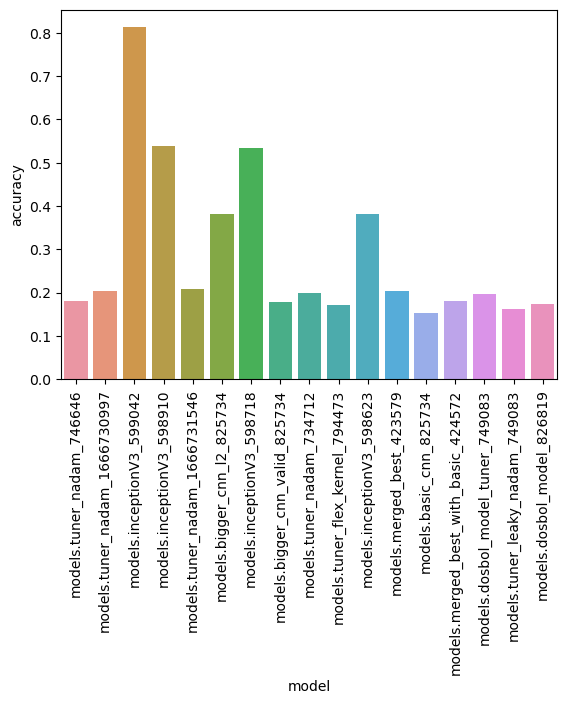

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
f = sns.barplot(data=models_df, x='model', y='accuracy')
f.set_xticklabels(labels=models_df['model'], rotation=90)
plt.show()

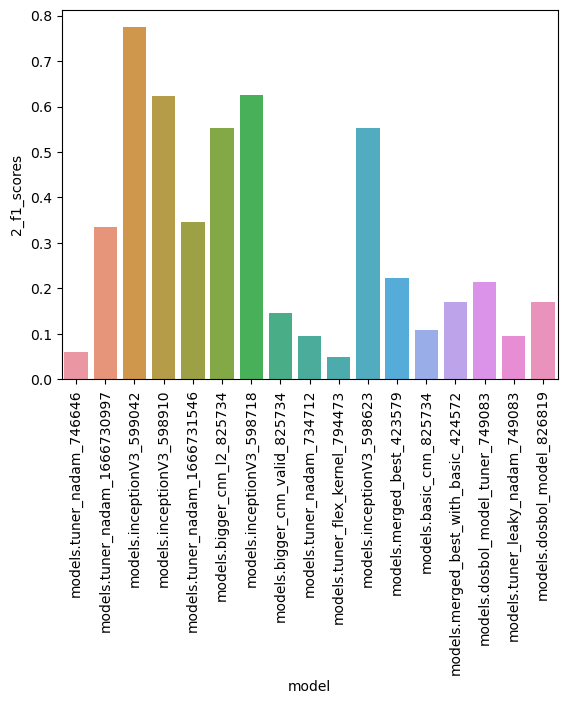

In [12]:
f = sns.barplot(data=models_df, x='model', y='2_f1_scores')
f.set_xticklabels(labels=models_df['model'], rotation=90)
plt.show()

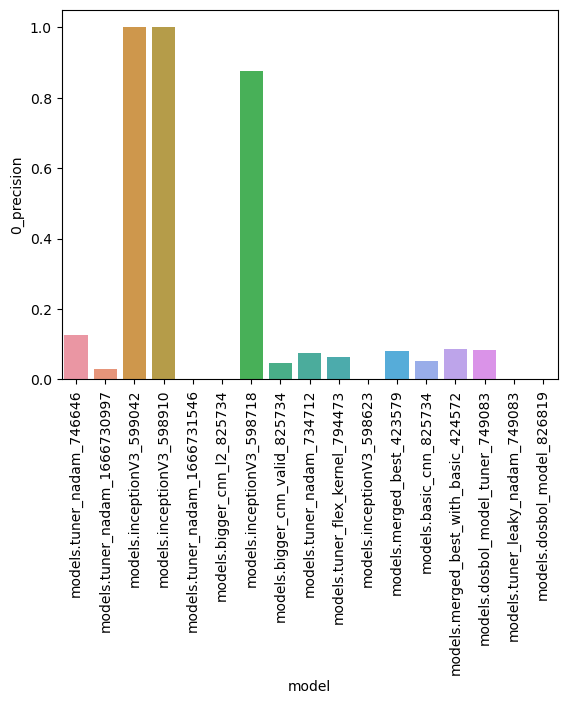

In [13]:
f = sns.barplot(data=models_df, x='model', y='0_precision')
f.set_xticklabels(labels=models_df['model'], rotation=90)
plt.show()

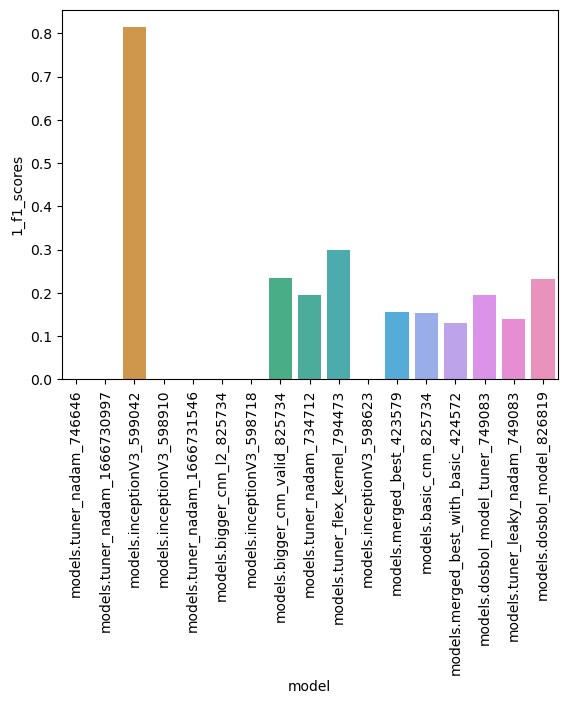

In [14]:
f = sns.barplot(data=models_df, x='model', y='1_f1_scores')
f.set_xticklabels(labels=models_df['model'], rotation=90)
plt.show()

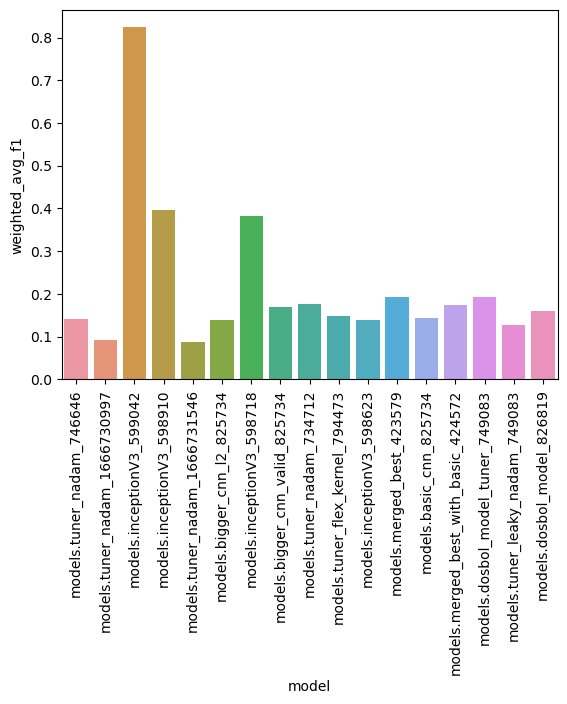

In [15]:
f = sns.barplot(data=models_df, x='model', y='weighted_avg_f1')
f.set_xticklabels(labels=models_df['model'], rotation=90)
plt.show()